# 識別問題を実データ使ってといてみよう

簡単なところで，IRIS データを使ってやってみる．
IRIS は 菖蒲のデータを集めたもので scikit-learn のデータセットの中に含まれている．
データとしては，３種類のクラス 'iris-setosa', 'iris-verginica', 'iris-versicolor' に関して
がく片(sepal)と花びら(petal)の長さと幅を取ったデータ（たしか）．
各クラスは50個のサンプルという構成.



In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.animation as animation
from matplotlib import colors
import seaborn as sns; sns.set()

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

import pandas as pd

np.random.seed(1234)

In [2]:
# iris データを読み込んで諸元を表示してみる
iris = datasets.load_iris()

#
print(iris['DESCR'])

# データの各次元の意味
print(iris['feature_names'])

# 各クラスラベル
print(iris['target_names'])

# データを最初の10個分表示してみる
print(iris['data'][:10])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# データをデータフレーム化しておこう

X_data = iris['data']

# 各クラスの名前リストを作っておこう
class_data = [iris['target_names'][cid] for cid in iris['target']]

df_Data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df_Class = pd.DataFrame(data=class_data, columns=['Class'])

# データフレームを結合しておく
df = pd.concat([df_Class, df_Data], axis=1)
df

,Class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

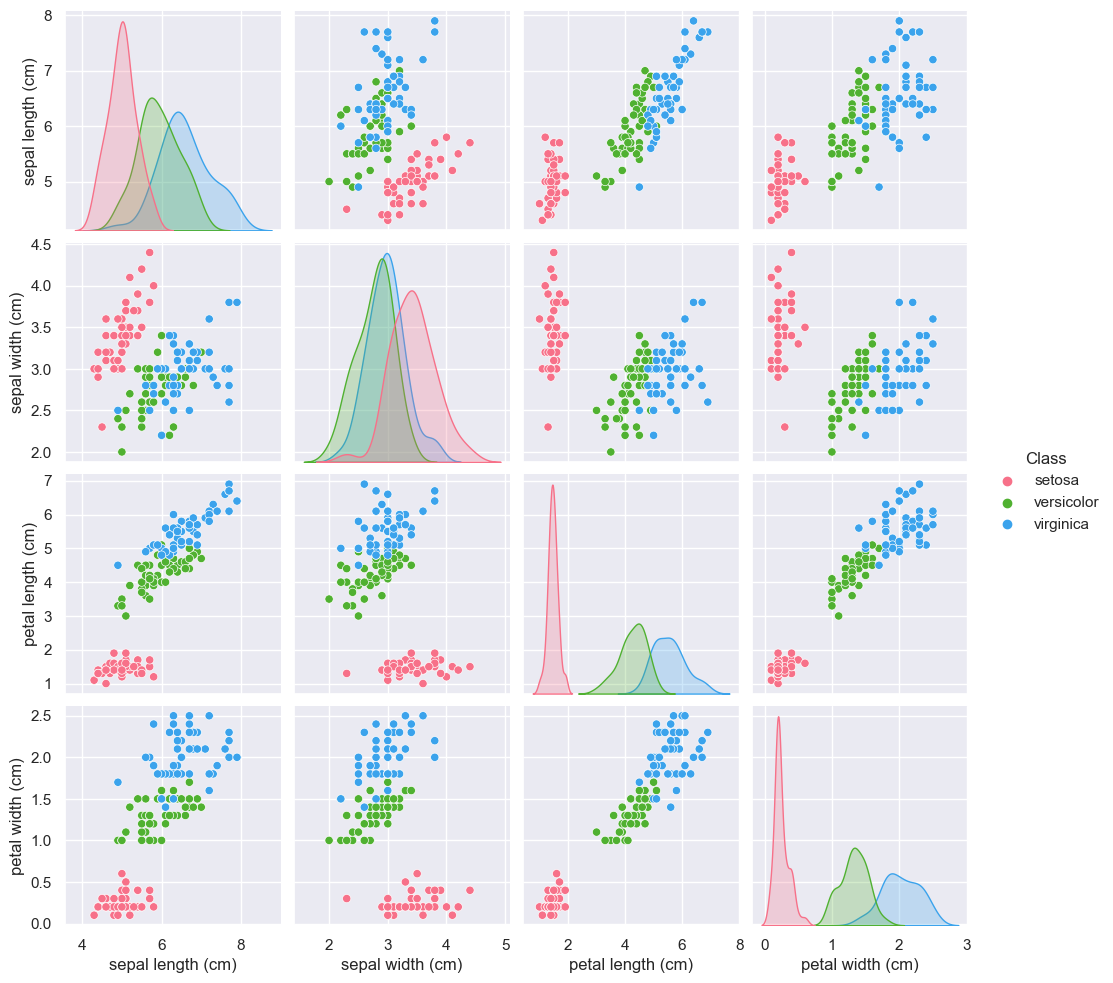

In [4]:
# 可視化してみる
sns.pairplot(df, hue='Class', palette="husl")

4つの特徴量

- sepal length (雄しべの長さ)
- sepal width (雄しべの幅)
- petal length (雌しべの長さ)
- petal width (雌しべの長さ)

に関する，それぞれの散布図が並んで，対角方向に，（近似した）分布が出ている．

クラスは3クラスなので，赤，緑，青が各クラスに対応する．

この，3クラスの色分けでいろいろとわかる．
散布図を見る限り 'setosa' クラスが浮いていそうとか．

とりあえず，講義内容に沿うように前処理として以下のことを考える

* クラスとしては 'versicolor' と 'verginica' の2クラス分類
* 特徴量は 'sepal length' と 'petal length' あたりで

を使ってみよう．

c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\theko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


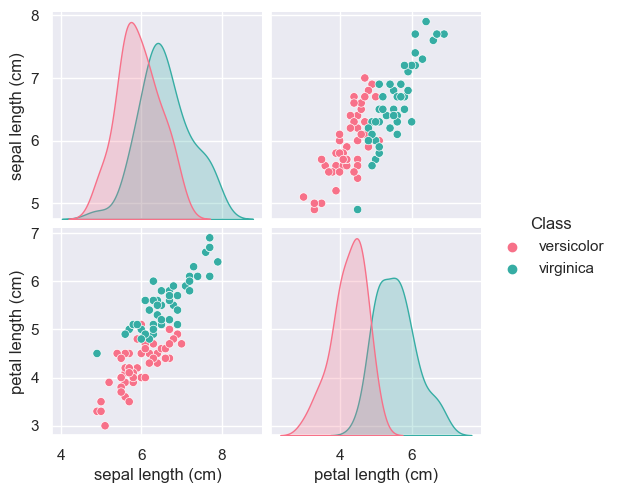

In [5]:
# 'setosa' を除外した2クラスで特徴量を絞ってのデータフレームを作って散布図をとってみる
# 0, 1, 3 はカラム指定で第０カラムがクラス名，第１，第３が所望の特徴量
df_limited = df[df['Class'] != 'setosa'].iloc[:, [0, 1, 3]]

sns.pairplot(df_limited, hue='Class', palette="husl")

sepal length の分布のみ（左上の分布）でみるとだいぶ重なっているのが見て取れる．
ただ，散布図を見る限り，
まぁ，このくらいなら分離できそうかなぁというラインではあります．

ということで，これに関して

0. 最小二乗法
1. Fisher's LDA
2. Perceptron
3. Logistic 回帰

で識別器を構成してみよう．

In [22]:
# 学習データと評価データをわける．

# 一応データフレームのままでも扱えるが，numpy の型へ戻しておこう．
# とくに欠損などの処理もないので

# 第０カラムがクラスラベル，第１カラム以降が数値データ
X = df_limited.iloc[:, 1:].values

# y = df_limited.iloc[:, 0].values
# とすると，'versicolor', 'virginica' からなる配列が得られる．
# sklearn は優秀なのでこのままでも取り扱えるけど，まえのノートの関数を
# そのまま使うとすると，平均とか求めるケースもあるので，ここでは数値化して ±1 ラベルを与える．
# この場合には values ではなく, 
# pd.get_dummies(y) を用いる．すると one-hot-vector が得られるので
# 第１列のみをデータとする．すなわち 'versicolor':1 , 'verginica':0 というラベルがでてくる
# あとは，これを2倍して1を引けば±１になる

y_dummy = pd.get_dummies(df_limited.iloc[:, 0]).values
y = 2 * y_dummy[:, 0].astype(int) - 1
print(y)
# で，学習データと評価データに分割
# これも train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


続いて，描画等の準備を行う

In [7]:
def draw_boundary(w, ax, x_rng=(0, 1), y_rng=(0, 1)):
    '''
    境界線を引く関数
    '''
    # w0 + w1 x1 + w2 x2 = 0 が分離境界のはずなので
    # x2 = (w0 + w1 x1) / (-w2) が境界線
    xx = np.linspace(x_rng[0], x_rng[1])
    yy = (w[0] + w[1] * xx) / (-w[2])
    
    im = ax.plot(xx, yy, 'g-', linewidth=3)
    
    return im


def draw_prob(w, ax, x_rng=(0, 1), y_rng=(0, 1), alpha=0.8):
    '''
    確率を描画する関数
    '''
    # w0 + w1 x1 + w2 x2 = 0 が分離境界のはずなので
    # x2 = (w0 + w1 x1) / (-w2) が境界線
    xx = np.linspace(x_rng[0], x_rng[1])
    yy = (w[0] + w[1] * xx) / (-w[2])
    
    xx, yy = np.meshgrid(np.linspace(x_rng[0], x_rng[1], 256),
                         np.linspace(y_rng[0], y_rng[1], 256))
    mesh_dat = np.c_[xx.ravel(), yy.ravel()]
    Z = y_prob(mesh_dat, w)
    Z = Z.reshape(xx.shape)
    
    ax.pcolormesh(xx, yy, Z, cmap='coolwarm', norm=colors.Normalize(0., 1.), zorder=0, alpha=alpha)
    im = ax.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # im = ax.plot(xx, yy, 'g-', linewidth=3)
    
    return im
    
    
def draw_data(ax, X, y, label_1=None, label_2=None, symbol_1='ro', symbol_2='bo', alpha=0.5, x_rng=(0, 1), y_rng=(0, 1)):
    '''
    散布図を描画する関数
    '''
    ax.plot(X[y==1, 0], X[y==1, 1], symbol_1, alpha=alpha, label=label_1)
    ax.plot(X[y!=1, 0], X[y!=1, 1], symbol_2, alpha=alpha, label=label_2)
    

Text(0.5, 1.0, 'Iris Data')

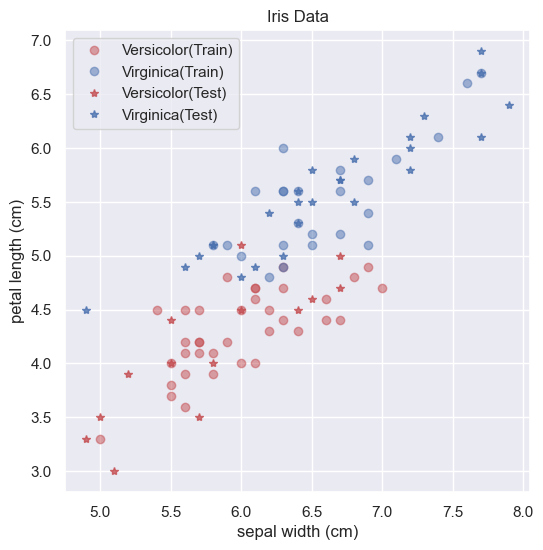

In [8]:
# データがどういう分布になっているか，散布図で確認
fig, ax = plt.subplots(figsize=(6, 6))

draw_data(ax, X_train, y_train, label_1='Versicolor(Train)', label_2='Virginica(Train)', symbol_1='ro', symbol_2='bo', alpha=0.5)
draw_data(ax, X_test, y_test, label_1='Versicolor(Test)', label_2='Virginica(Test)', symbol_1='r*', symbol_2='b*', alpha=0.8)
ax.legend()
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_title('Iris Data')

In [9]:
print('学習データの幅', X_train.max(axis=0) - X_train.min(axis=0))
print('学習データの中心', X_train.mean(axis=0))

学習データの幅 [2.7 3.4]
学習データの中心 [6.22833333 4.785     ]


ふむ，とりあえずトレーニングデータで中心化するくらいで前処理としては大丈夫かな？


In [10]:
X_Center = X_train.mean(axis=0)
X_train = (X_train - X_Center) 

print('学習データの幅（補正後）', X_train.max(axis=0) - X_train.min(axis=0))
print('学習データの中心（補正後）', X_train.mean(axis=0))

# テストデータの方も補正しておこう

X_test = (X_test - X_Center) 

print('評価データの幅（補正後）', X_test.max(axis=0) - X_test.min(axis=0))
print('評価データの中心（補正後）', X_test.mean(axis=0))

学習データの幅（補正後） [2.7 3.4]
学習データの中心（補正後） [ 7.10542736e-16 -1.08061708e-15]
評価データの幅（補正後） [3.  3.9]
評価データの中心（補正後） [0.08416667 0.3025    ]


Text(0.5, 1.0, 'Iris Data')

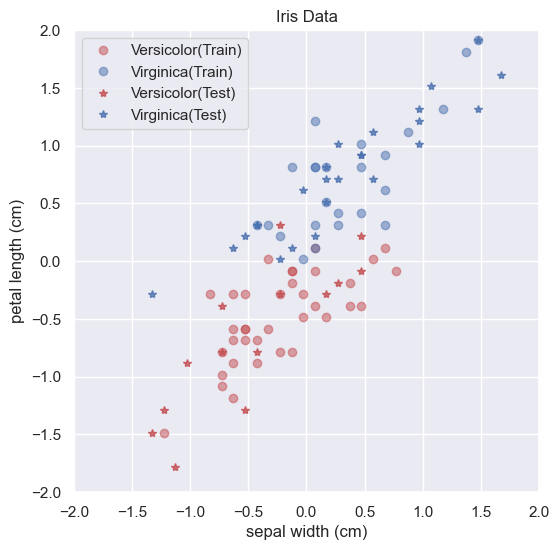

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))

draw_data(ax, X_train, y_train, label_1='Versicolor(Train)', label_2='Virginica(Train)', symbol_1='ro', symbol_2='bo', alpha=0.5)
draw_data(ax, X_test, y_test, label_1='Versicolor(Test)', label_2='Virginica(Test)', symbol_1='r*', symbol_2='b*', alpha=0.8)
ax.legend()
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('Iris Data')

# 最小二乗法による解法

分離する平面を回帰から求めようとするわりと無理ゲーなやり方．

In [12]:
# まずは最小二乗法から 07_1.ClassifierLSQ.ipynb からコピペ

def SolverLSQ(x, y):
    '''
    x はベクトル(D次元なので (N, D) な行列として受け取る)，y はラベル（N次元）
    単純に回帰平面を求めるソルバー
    '''
    E_x = x.mean(axis=0)
    E_y = y.mean()
    
    # 中心化(今回は必要ないが，一応)
    new_x = x - E_x
    new_y = y - E_y
    
    # 2次統計量の算出
    N, _ = x.shape
    E_xx = x.T @ x / N
    E_xy = y @ x / N
    E_yy = y @ y / N

    # 停留点を出しておく
    w_0 = 0
    m = np.linalg.solve(E_xx, E_xy)

    # で答えは求まった．あとは平行移動した分を元に戻せばOK
    # y_new = y - E_y
    # x_new = x - E_y としていて，
    # y_new = w xnew + w_0 という系で解いていたのだから
    # y - E_y = w (x - E_x) + w_0 な形のはず．
    # y = w x + w_0 + E_y - w E_x なので， w_0 -> w_0 + E_y - w E_x とすれば解決

    w = m
    w_0 = w_0 + E_y - m @ E_x
    
    return w, w_0


# じゃ，計算すっか
def predictLSQ(x, w, w0):
    return np.sign(w @ x.T + w0)



誤り個数 2


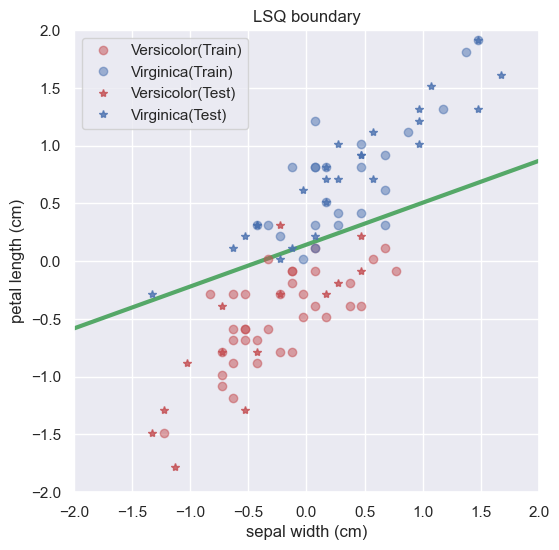

In [13]:
# ということで分離平面を求めてみよう
w_tmp, w_0 = SolverLSQ(X_train, y_train)

# w_0, w の順に並べて一つの配列に
w = np.array([w_0, w_tmp[0], w_tmp[1]])

fig, ax = plt.subplots(figsize=(6, 6))

draw_boundary(w, ax, x_rng=(-2, 2), y_rng=(-2, 2))

draw_data(ax, X_train, y_train, label_1='Versicolor(Train)', label_2='Virginica(Train)', symbol_1='ro', symbol_2='bo', alpha=0.5)
draw_data(ax, X_test, y_test, label_1='Versicolor(Test)', label_2='Virginica(Test)', symbol_1='r*', symbol_2='b*', alpha=0.8)
ax.legend()
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('LSQ boundary')

# 誤り個数を計算してみる
y_pred = predictLSQ(X_test, w_tmp, w_0)
y_err = np.count_nonzero(y_pred - y_test)

print('誤り個数', y_err)

うん，それなりかな．


# Fisher's LDA による判別

さて，本命の一つ Fisher の方法．
これも 07_2.ClassifierLDA.ipynb からのコピペと，ちょっとだけ改変
ラベルが ±1 を仮定しているので，これを [0, 1] を受け取れるようにしておく

In [14]:
# じゃ，計算すっか
def predictLDA(x, w, w0):
    return np.sign(w @ x.T + w0)


def SolverLDA(x, y):
    '''
    x はベクトル(D次元なので (N, D) な行列として受け取る)，y はラベル（N次元）
    LDA で回帰平面を求めるソルバー
    '''   
    # とりあえずデータの中心化から
    Ex = x.mean(axis=0)
    new_x = x - Ex
    
    # クラスごとにデータを分割しておく
    # x_1 = new_x[y == +1, :]
    # x_2 = new_x[y == -1, :]
    # N_1 = np.sum(y == +1)
    # N_2 = np.sum(y == -1)

    # クラスラベルの仮定が合わないのでちょっとだけ修正
    x_1 = new_x[y == 1, :]
    x_2 = new_x[y != 1, :]
    N_1 = np.sum(y == 1)
    N_2 = np.sum(y != 1)
    
    u_1 = x_1.mean(axis=0) # クラス１の重心
    u_2 = x_2.mean(axis=0) # クラス２の重心
    
    S_w = (x_1 - u_1).T @ (x_1 - u_1) / N_1 + (x_2 - u_2).T @ (x_2 - u_2) / N_2
    
    w = np.linalg.solve(S_w, u_1 - u_2)
    w_0 = 0
    
    # あとは中心化で平行移動した分をずらしておく
    # y(x) = w^T new_x + w_0 として解いていて new_x = x - E_x なので
    # w^T (x - E_x) + w_0 = 0 を開くと w^T x - w^T E_x + w_0 = 0
    
    w_0 = w_0 - w @ Ex
    
    return w, w_0

誤り個数 2


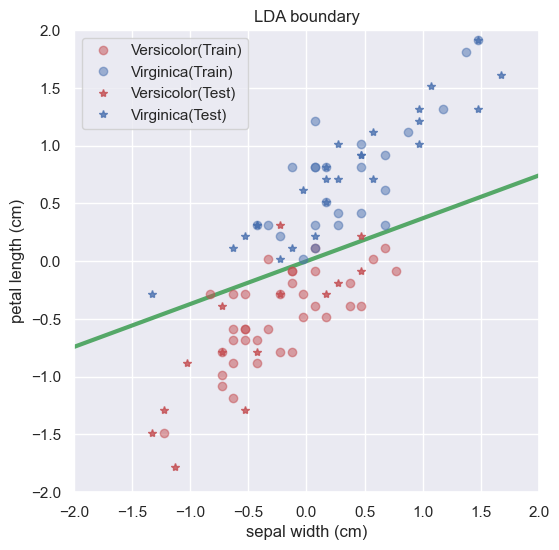

In [15]:
# 解いてみよう
w_tmp, w_0 = SolverLDA(X_train, y_train)

# w_0, w の順に並べて一つの配列に
w = np.array([w_0, w_tmp[0], w_tmp[1]])

# 描画
fig, ax = plt.subplots(figsize=(6, 6))

draw_boundary(w, ax, x_rng=(-2, 2), y_rng=(-2, 2))

draw_data(ax, X_train, y_train, label_1='Versicolor(Train)', label_2='Virginica(Train)', symbol_1='ro', symbol_2='bo', alpha=0.5)
draw_data(ax, X_test, y_test, label_1='Versicolor(Test)', label_2='Virginica(Test)', symbol_1='r*', symbol_2='b*', alpha=0.8)
ax.legend()
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('LDA boundary')

# 誤り個数を計算してみる
y_pred = predictLDA(X_test, w_tmp, w_0)
y_err = np.count_nonzero(y_pred - y_test)

print('誤り個数', y_err)


それなりにまともっぽい．
では，間違い個数も出しておこう．

ちなみに LDA は sklearn の中で実装済みで，
もっと簡単に求まる

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# あとはお作法に従って
classifier = LDA()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# 実質２行くらい
y_err = np.count_nonzero(y_pred - y_test)

print('誤り個数', y_err)

誤り個数 2


In [17]:
print('スクラッチ版の w, w0', w_tmp, w_0)
print('sklearn の coef', classifier.coef_, classifier.intercept_)

スクラッチ版の w, w0 [ 1.65062912 -4.44646395] -5.977767409612711e-15
sklearn の coef [[ 3.26953747 -9.01011637]] [1.29425055]


# Perceptron + 誤り訂正学習

次は，Perceptron に誤り訂正学習を施したもの．最近は誤差逆伝播を使うけど
原初のやつはこのような学習方法で，神経科学的にも D.O.Hebb の仮説に沿っているので
それなりにリーズナブル

やっぱりコピペｗ．07_3.ClassfierPerceptron.ipynb 参照

In [18]:
def predictPerceptron(x, w):
    '''
    パーセプトロンの出力
    '''
    return np.sign(weight_sum(w, x))

def weight_sum(w, x):
    '''
    D入力，１出力の単純パーセプトロンの内部状態計算
    面倒なので，w は，(w0, w1, ...., wD) な D+1 次元ベクトル
    x は，N 個の入力を取り扱えるようにしておくので(N, D)な行列
    '''
    
    # x の最初の列に 1 からなるN行ベクトルを付け加えてｗを適正に扱えるようにしておく
    N = x.shape[0]
    x_new = np.hstack((np.ones((N, 1)), x))
    
    return x_new @ w   # これに np.sign をかぶせればパーセプトロンの出力


def update_w(w, x, t, eta=0.001):
    w_sum = weight_sum(w, x)

    # x の最初の列に 1 からなるN行ベクトルを付け加えてｗを適正に扱えるようにしておく
    N = x.shape[0]
    x_new = np.hstack((np.ones((N, 1)), x))

    fail_set = t * w_sum < 0 # 教師の符号と一致しない子を抜き出す
    delta = eta * t[fail_set] @ x_new[fail_set, :]
    
    return w + delta


def E_p(w, x, t):
    '''
    コスト関数値を返す
    '''
    w_sum = weight_sum(w, x)
    fail_set = t * w_sum < 0
    return - weight_sum(w, x[fail_set,:]) @ t[fail_set]


Epoch0: 32.947727828053914
Epoch1: 31.559710466942803
Epoch2: 30.171693105831693
Epoch3: 28.805034660312195
Epoch4: 27.459637660312197
Epoch5: 26.114240660312195
Epoch6: 24.7688436603122
Epoch7: 23.442235442933075
Epoch8: 22.14002374848863
Epoch9: 20.838387375842153
Epoch10: 19.568140931397707
Epoch11: 18.30189413457197
Epoch12: 17.048691106794195
Epoch13: 15.795488079016415
Epoch14: 14.575402584597466
Epoch15: 13.410661334597467
Epoch16: 12.245920084597465
Epoch17: 11.081178834597463
Epoch18: 9.976192448294448
Epoch19: 8.99081508518071
Epoch20: 8.047470679729832
Epoch21: 7.203453998940809
Epoch22: 6.454081725816509
Epoch23: 5.732293614705396
Epoch24: 5.043428015672794
Epoch25: 4.476480445214664
Epoch26: 3.945489003528319
Epoch27: 3.4600049757505422
Epoch28: 2.99398938170229
Epoch29: 2.559206591178152
Epoch30: 2.1790478967337075
Epoch31: 1.8123962410468653
Epoch32: 1.4790776226705433
Epoch33: 1.2459007846869392
Epoch34: 1.1142982309619096
Epoch35: 1.0240552947031536
Epoch36: 0.95439285

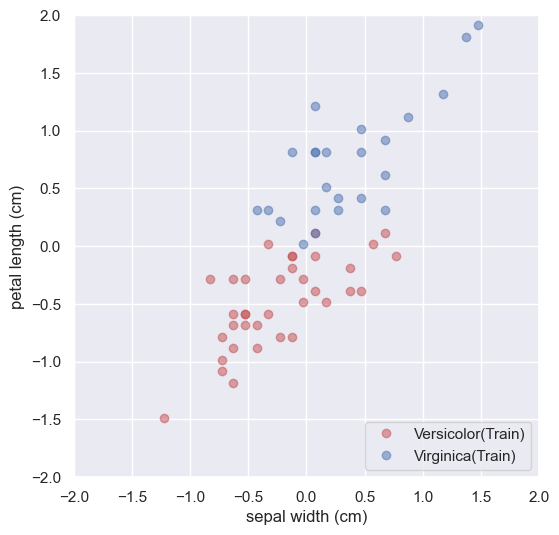

In [19]:
# 途中経過をアニメーションにしている．必要ない場合は
# このセルをコメントアウト

fig, ax = plt.subplots(figsize=(6, 6))
# データ点の描画
draw_data(ax, X_train, y_train, label_1='Versicolor(Train)', label_2='Virginica(Train)', symbol_1='ro', symbol_2='bo', alpha=0.5)
# draw_data(ax, X_test, y_test, label_1='Versicolor(Test)', label_2='Virginica(Test)', symbol_1='r*', symbol_2='b*', alpha=0.8)
ax.legend()
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# パーセプトロンの学習
w = np.random.uniform(low=-1, high=1, size=3)

ims = []
Eps = []

ims.append(draw_boundary(w, ax, x_rng=(-2, 2)))
current_loss = E_p(w, X_train, y_train)
Eps.append(current_loss)
print(f'Epoch{0}: {current_loss}')

for n in range(300):
    w = update_w(w, X_train, y_train, eta=1e-3)
    ims.append(draw_boundary(w, ax, x_rng=(-2, 2)))
    current_loss = E_p(w, X_train, y_train)
    Eps.append(current_loss)
    
    print(f'Epoch{n+1}: {current_loss}')

ani = animation.ArtistAnimation(fig, ims)


In [21]:
ani.save('IrisPerceptron.mp4', writer='ffmpeg')
ani.save('IrisPerceptron.gif', writer='Pillow')

MovieWriter Pillow unavailable; using Pillow instead.


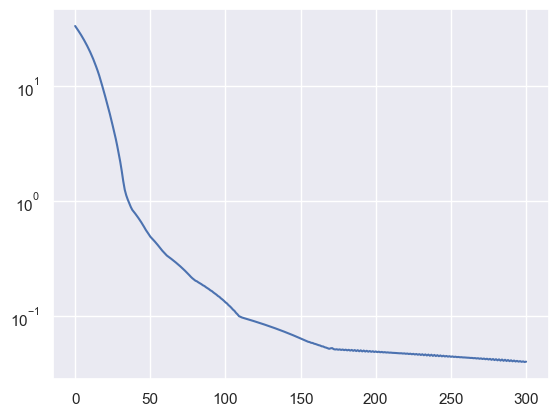

In [ ]:
plt.semilogy(np.arange(len(Eps)), np.array(Eps))

誤り個数 3


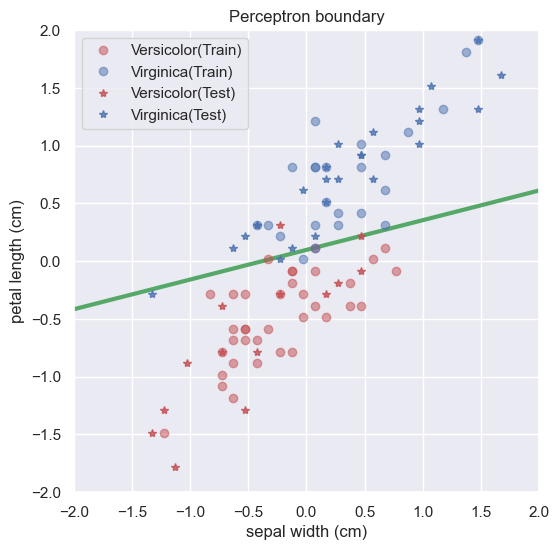

In [ ]:
# 描画
fig, ax = plt.subplots(figsize=(6, 6))

draw_boundary(w, ax, x_rng=(-2, 2), y_rng=(-2, 2))

draw_data(ax, X_train, y_train, label_1='Versicolor(Train)', label_2='Virginica(Train)', symbol_1='ro', symbol_2='bo', alpha=0.5)
draw_data(ax, X_test, y_test, label_1='Versicolor(Test)', label_2='Virginica(Test)', symbol_1='r*', symbol_2='b*', alpha=0.8)
ax.legend()
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('Perceptron boundary')

# 誤り個数を計算してみる
y_pred = predictPerceptron(X_test, w)
y_err = np.count_nonzero(y_pred - y_test)

print('誤り個数', y_err)

# それではロジスティック回帰

ロジスティック回帰は IRLS でとくことにする．

In [ ]:
# def logistic(x):
#    '''
#    ロジスティクシグモイド関数
#    '''
#    return 1/(1+np.exp(-x))


def logistic(x):
    '''
    ロジスティクシグモイド関数
    '''
    return np.exp(np.minimum(x, 0)) / (1 + np.exp(- np.abs(x)))

def y_prob(x, w):
    '''
    D入力，１出力
    面倒なので，w は，(w0, w1, ...., wD) な D+1 次元ベクトル
    x は，N 個の入力を取り扱えるようにしておくので(N, D)な行列
    '''
    # x の最初の列に 1 からなるN行ベクトルを付け加えてｗを適正に扱えるようにしておく
    N, _ = x.shape
    x_new = np.hstack((np.ones((N, 1)), x))
    
    return logistic(x_new @ w)


def E_p(w, x, t):
    # x の最初の列に 1 からなるN行ベクトルを付け加えてｗを適正に扱えるようにしておく
    eps = 1e-15
    t_new = (t + 1) / 2  # ラベルを (0, 1) に変更
    y = y_prob(x, w)
    return -np.sum(t_new * np.log(y+eps) + (1-t_new) * np.log(1-y+eps))

def update_w(w, x, t):
    
    # x の最初の列に 1 からなるN行ベクトルを付け加えてｗを適正に扱えるようにしておく
    N = x.shape[0]
    Phi = np.hstack((np.ones((N, 1)), x))
    t_new = (t + 1) / 2  # ラベルを (0, 1) に変更

    y = y_prob(x, w)
    grad = Phi.T @ (y-t_new)
    rr = y * (1-y)
    R = np.diag(rr)
    Hessian = Phi.T @ R @ Phi
    diff = np.linalg.solve(Hessian, Phi.T @ (y-t_new))
    
    return sum(grad**2), w - diff


In [ ]:
w = np.random.uniform(low=-1, high=1, size=3)

for n in range(20):
    g2, w = update_w(w, X_train, y_train)
    loss_value = E_p(w, X_train, y_train)
    print(f'Epoch:{n+1:02d}, {g2}, {loss_value}')
    if g2 < 1e-4:
        break


Epoch:01, 464.05456714314727, 14.687429939430668
Epoch:02, 24.369525762861137, 9.418840034884441
Epoch:03, 3.9469436977804526, 6.5010389723466995
Epoch:04, 0.6707574388385718, 4.925520461228873
Epoch:05, 0.1010999031899888, 4.252384920201211
Epoch:06, 0.011938713884061144, 4.0530700983124115
Epoch:07, 0.00099537305792341, 4.023573943330232
Epoch:08, 3.004660552548063e-05, 4.022579840767371


In [ ]:
print(w / np.sqrt(w @ w))

[ 0.08280025  0.14730239 -0.98561966]


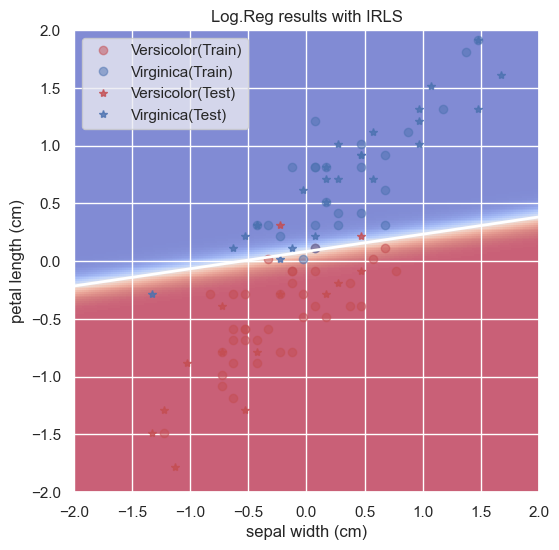

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))


# データ点の描画
draw_data(ax, X_train, y_train, label_1='Versicolor(Train)', label_2='Virginica(Train)', symbol_1='ro', symbol_2='bo', alpha=0.5)
draw_data(ax, X_test, y_test, label_1='Versicolor(Test)', label_2='Virginica(Test)', symbol_1='r*', symbol_2='b*', alpha=0.8)
ax.legend()
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('Log.Reg results with IRLS')

draw_prob(w, ax, x_rng=(-2, 2), y_rng=(-2, 2), alpha=0.6)


## sklearn の IRLS

まぁ，そんなごりごり計算しなくとも sklearn のロジスティック回帰でも問題ないわけで．．．


In [ ]:
from sklearn.linear_model import LogisticRegression

# sklearn のロジスティック回帰は L2 正則化が入っていて，これの効きの大きさの逆数をパラメータCで与える
classifier = LogisticRegression(C=1000)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

y_err = np.count_nonzero(y_pred - y_test)

print('誤り個数', y_err)


誤り個数 4


In [ ]:

# で，結果は 
# classifier.coef_, に，重み情報
# classifier.intercept_ に切片情報が入る．
# 
w = np.array([classifier.intercept_[0], classifier.coef_[0][0], classifier.coef_[0][1]])

print(w / np.sqrt(w @ w))

[ 0.08469688  0.14506604 -0.98579018]


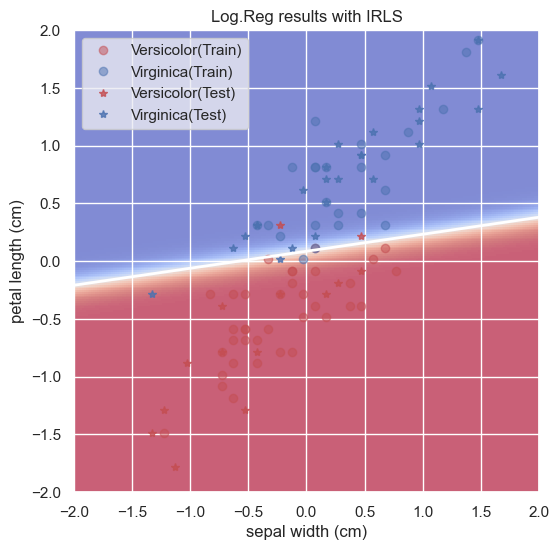

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

# データ点の描画
draw_data(ax, X_train, y_train, label_1='Versicolor(Train)', label_2='Virginica(Train)', symbol_1='ro', symbol_2='bo', alpha=0.5)
draw_data(ax, X_test, y_test, label_1='Versicolor(Test)', label_2='Virginica(Test)', symbol_1='r*', symbol_2='b*', alpha=0.8)
ax.legend()
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('Log.Reg results with IRLS')

draw_prob(w, ax, x_rng=(-2, 2), y_rng=(-2, 2), alpha=0.6)


# おまけ，サポートベクターマシン(SVM)

ロジスティック回帰以外だと，普通はここらへんを使うかな

In [ ]:
#clf = sklearn.svm.SVC(kernel='linear', C=1.)
from sklearn import svm
classifier = svm.SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

y_err = np.count_nonzero(y_pred - y_test)

print('誤り個数', y_err)


誤り個数 4


Text(0.5, 1.0, 'SVC boundary')

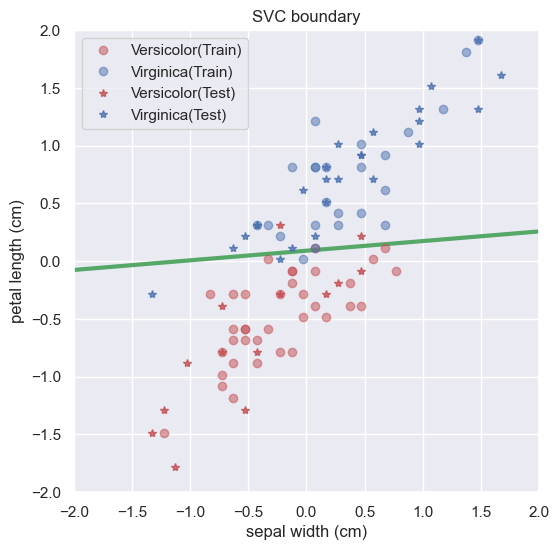

In [ ]:
w = np.array([classifier.intercept_[0], classifier.coef_[0][0], classifier.coef_[0][1]])

# 描画
fig, ax = plt.subplots(figsize=(6, 6))

draw_boundary(w, ax, x_rng=(-2, 2), y_rng=(-2, 2))

draw_data(ax, X_train, y_train, label_1='Versicolor(Train)', label_2='Virginica(Train)', symbol_1='ro', symbol_2='bo', alpha=0.5)
draw_data(ax, X_test, y_test, label_1='Versicolor(Test)', label_2='Virginica(Test)', symbol_1='r*', symbol_2='b*', alpha=0.8)
ax.legend()
ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('SVC boundary')